Возьмите датасет с отключением клиентов от телефонной компании.

Подготовьте данные для решения задачи.

Решите задачу с помощью нейронной сети, используя слои Dense как мы делали на уроке.

Ваша задача правильно написать “голову” сети и подобрать правильно loss функцию.


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

sns.set_style("darkgrid")

In [54]:
# Архитектура и модель
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(100, activation="relu", input_shape = (20,)))
model.add(layers.Dense(1, activation="sigmoid"))


In [55]:
# Компиляция модели
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               2100      
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
df = pd.read_csv("churn-bigml-80.csv")
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [19]:
df_test = pd.read_csv("churn-bigml-20.csv")
df_test.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


In [9]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [25]:
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
df_test.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)


In [26]:
df.shape, df_test.shape


((2666, 20), (667, 20))

In [27]:
df.dtypes.value_counts()

int64      8
float64    8
object     3
bool       1
dtype: int64

In [28]:
# выборка только столбцов с строковыми данными
df.select_dtypes(include=["O"])

,state,international_plan,voice_mail_plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
2661,SC,No,No
2662,AZ,No,Yes
2663,WV,No,No
2664,RI,No,No


In [29]:
x_train = df.drop(['state', 'churn'], axis = 1)
y_train = df['churn']
x_test = df_test.drop(['state', 'churn'], axis = 1)
y_test = df_test['churn']

In [30]:
# Create lists of numeric and categorical features
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

In [33]:
# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [36]:
# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [37]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [62]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size=512)

Epoch 1/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1819 - accuracy: 0.9407 - val_loss: 0.2029 - val_accuracy: 0.9250
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1814 - accuracy: 0.9419 - val_loss: 0.2029 - val_accuracy: 0.9235
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9419 - val_loss: 0.2036 - val_accuracy: 0.9220
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1809 - accuracy: 0.9415 - val_loss: 0.2040 - val_accuracy: 0.9205
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9419 - val_loss: 0.2034 - val_accuracy: 0.9220
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9426 - val_loss: 0.2027 - val_accuracy: 0.9220
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 0.9426 - val_loss: 0.2023 - val_accuracy: 0.9220
Epoch 8/200
6/6 [==========

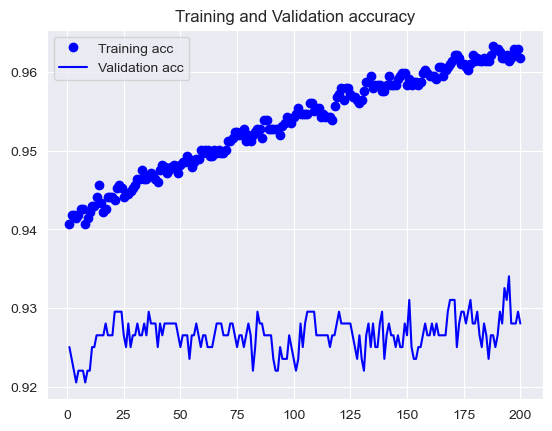

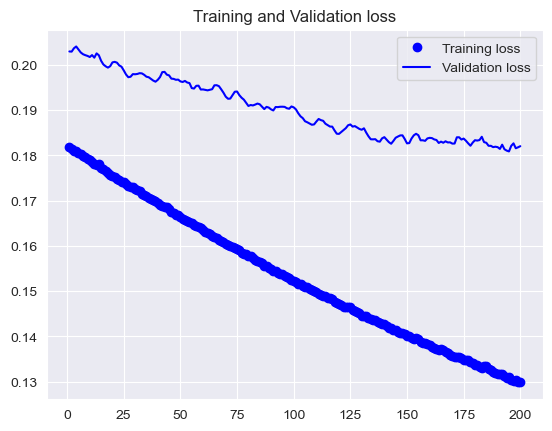

In [63]:

# графики
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [77]:
# Получаем прогнозы модели на тестовых данных
y_pred = model.predict(x_test)

# Округляем прогнозы до 0 или 1, чтобы получить бинарные предсказания
y_pred_binary = (y_pred > 0.5).astype(int)

21/21 [==============================] - 0s 403us/step


In [78]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

       False       0.94      0.97      0.96       572
        True       0.81      0.65      0.72        95

    accuracy                           0.93       667
   macro avg       0.87      0.81      0.84       667
weighted avg       0.92      0.93      0.92       667

